In [80]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.leitor import Leitor
from scripts.ambiente import Ambiente
from scripts.problems import MetroNew

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Problema #1

In [127]:
config1 = Leitor().loadJson('data/metroNew1.json')
config2 = Leitor().loadJson('data/metroNew2.json')

problem1 = MetroNew()
problem2 = MetroNew()

In [112]:
'''
ambiente1 = Ambiente(config1, problem)
ambiente1.run()
melhor = problem.decode(ambiente1.elite_population[0])
title = (
    'Caminho entre E14 e E7\n'
    'Caminho: ' + str(melhor) +  '\n' + 
    'Função Objetivo (Distância em km): {:.2}\n'.format(problem.objective_function(melhor)) +
    'Função de Penalidade (Tempo em horas): {:.2}\n'.format(problem.penality_function(melhor)) +
    'Fitness: {:.2}'.format(problem.fitness(melhor))
)

sns.lineplot(ambiente1.results_mean,color='Blue').set(title=title)
sns.lineplot(ambiente1.results_best,color='Red')
'''

"\nambiente1 = Ambiente(config1, problem)\nambiente1.run()\nmelhor = problem.decode(ambiente1.elite_population[0])\ntitle = (\n    'Caminho entre E14 e E7\n'\n    'Caminho: ' + str(melhor) +  '\n' + \n    'Função Objetivo (Distância em km): {:.2}\n'.format(problem.objective_function(melhor)) +\n    'Função de Penalidade (Tempo em horas): {:.2}\n'.format(problem.penality_function(melhor)) +\n    'Fitness: {:.2}'.format(problem.fitness(melhor))\n)\n\nsns.lineplot(ambiente1.results_mean,color='Blue').set(title=title)\nsns.lineplot(ambiente1.results_best,color='Red')\n"

In [128]:
ambientes1 = [Ambiente(config1, problem1) for _ in range(30)]
for amb in ambientes1:
    amb.run()

100%|██████████| 100/100 [00:00<00:00, 634.61it/s]


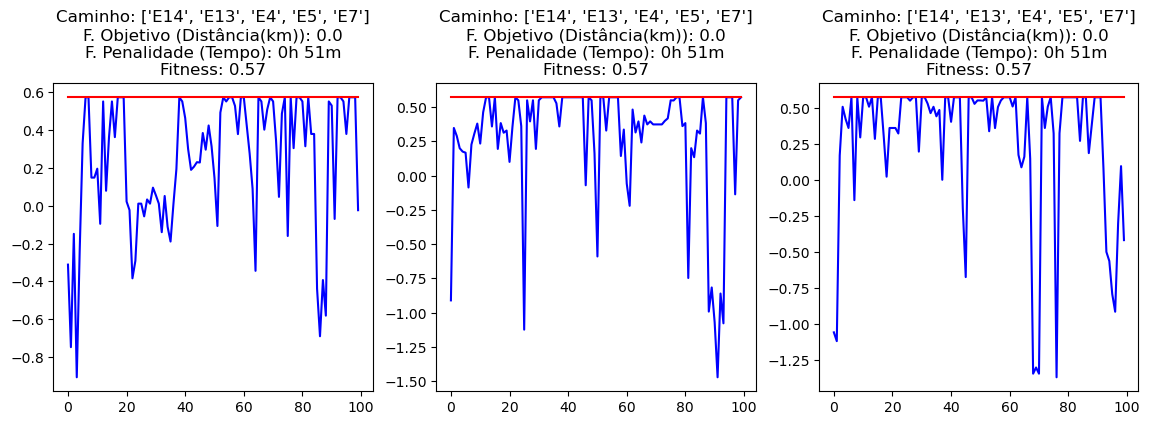

In [129]:
fig, axes = plt.subplots(1,3,figsize=(14,4))

for i in range(3):
    melhor = problem1.decode(ambientes1[i].elite_population[0])
    tempo = problem1.penality_function(melhor)

    title = (
        'Caminho: ' + str(melhor) +  '\n' + 
        'F. Objetivo (Distância(km)): {:.2}\n'.format(problem1.objective_function(melhor)) +
        'F. Penalidade (Tempo): ' + str(int(tempo//1))+'h ' + str(int((tempo%1)*60))+'m\n'
        'Fitness: {:.2}'.format(problem1.fitness(melhor))
    )

    sns.lineplot(ambientes1[i].results_mean,color='Blue',ax=axes[i]).set(title=title)
    sns.lineplot(ambientes1[i].results_best,color='Red',ax=axes[i])

Problema #2

In [130]:
ambientes2 = [Ambiente(config2, problem2) for _ in range(30)]
for amb in ambientes2:
    amb.run()

100%|██████████| 100/100 [00:00<00:00, 474.02it/s]


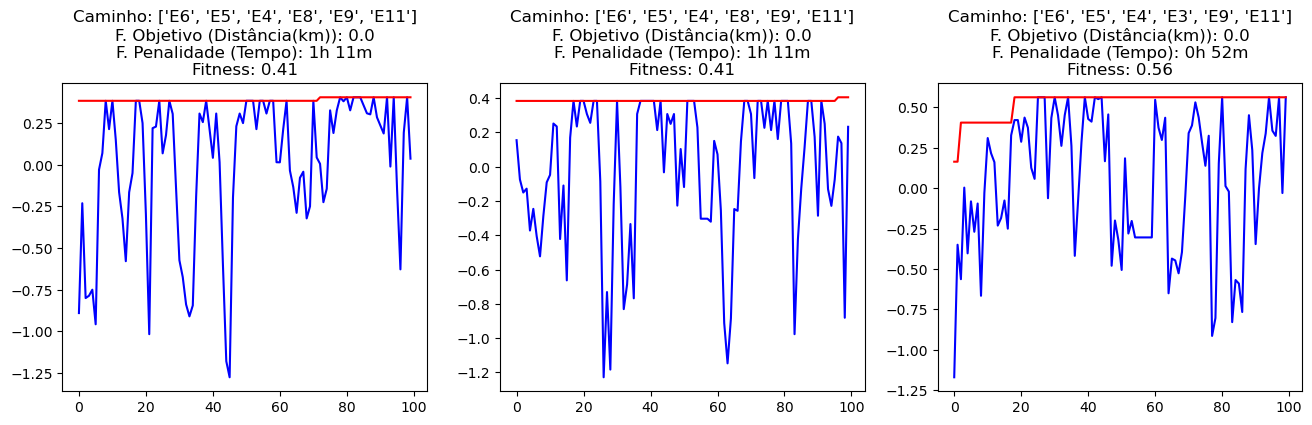

In [131]:
fig, axes = plt.subplots(1,3,figsize=(16,4))

for i in range(3):
    melhor = problem2.decode(ambientes2[i].elite_population[0])
    tempo = problem2.penality_function(melhor)
    title = (
        'Caminho: ' + str(melhor) +  '\n' + 
        'F. Objetivo (Distância(km)): {:.2}\n'.format(problem2.objective_function(melhor)) +
        'F. Penalidade (Tempo): ' + str(int(tempo//1))+'h ' + str(int((tempo%1)*60))+'m\n'
        'Fitness: {:.2}'.format(problem2.fitness(melhor))
    )

    sns.lineplot(ambientes2[i].results_mean,color='Blue',ax=axes[i]).set(title=title)
    sns.lineplot(ambientes2[i].results_best,color='Red',ax=axes[i])

In [132]:
p1_df = [

]
p2_df = [problem2.fitness(problem2.decode(amb.elite_population[0])) for amb in ambientes2]
fitness_df = pd.DataFrame(
    {
        'E14 para E7': problem1_fitness,
        'E6 para E11': problem2_fitness
    }
)
fitness_df

,E14 para E7,E6 para E11
0,0.572083,0.405417
1,0.572083,0.405417
2,0.572083,0.562083
3,0.572083,0.562083
4,0.572083,0.562083
5,0.572083,0.384167
6,0.572083,0.562083
7,0.572083,0.562083
8,0.572083,0.562083
9,0.572083,0.384167


<Axes: >

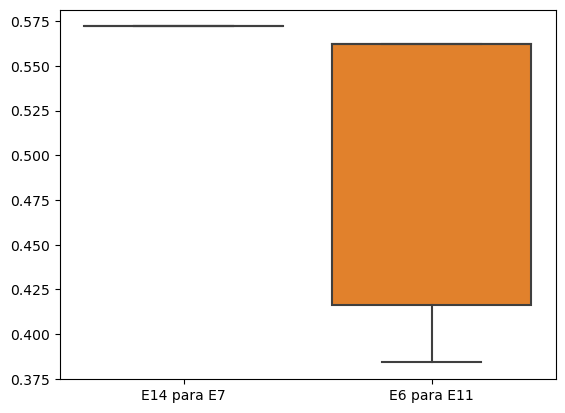

In [135]:
sns.boxplot(fitness_df)

In [136]:
for amb in ambientes2:
    melhor = problem2.decode(amb.elite_population[0])
    print('fitness:{:.2}'.format(problem2.fitness(melhor)), 'solucao:',melhor)

fitness:0.41 solucao: ['E6', 'E5', 'E4', 'E8', 'E9', 'E11']
fitness:0.41 solucao: ['E6', 'E5', 'E4', 'E8', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.38 solucao: ['E6', 'E5', 'E8', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.38 solucao: ['E6', 'E5', 'E8', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.45 solucao: ['E6', 'E5', 'E4', 'E3', 'E2', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3', 'E9', 'E11']
fitness:0.56 solucao: ['E6', 'E5', 'E4', 'E3',

In [17]:
problem.straight_distance_dataframe

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Estacao,,,,,,,,,,,,,,
E1,0.0,10.0,18.5,24.8,36.4,38.8,35.8,25.4,17.6,9.1,16.7,27.3,27.6,29.8
E2,10.0,0.0,8.5,14.8,26.6,29.1,26.1,17.3,10.0,3.5,15.5,20.9,19.1,21.8
E3,18.5,8.5,0.0,6.3,18.2,20.6,17.6,13.6,9.4,10.3,19.5,19.1,12.1,16.6
E4,24.8,14.8,6.3,0.0,12.0,14.4,11.5,12.4,12.6,16.7,23.6,18.6,10.6,15.4
E5,36.4,26.6,18.2,12.0,0.0,3.0,2.4,19.4,23.3,28.2,34.2,24.8,14.5,17.9
E6,38.8,29.1,20.6,14.4,3.0,0.0,3.3,22.3,25.7,30.3,36.7,27.6,15.2,18.2
E7,35.8,26.1,17.6,11.5,2.4,3.3,0.0,20.0,23.0,27.3,34.2,25.7,12.4,15.6
E8,25.4,17.3,13.6,12.4,19.4,22.3,20.0,0.0,8.2,20.3,16.1,6.4,22.7,27.6
E9,17.6,10.0,9.4,12.6,23.3,25.7,23.0,8.2,0.0,13.5,11.2,10.9,21.2,26.6


In [24]:
ex = problem.decode(ambiente.population[0])
ex

['E7', 'E5', 'E6']

In [36]:
problem._straight_distance(ex[-1],problem.end)

18.2

In [37]:
problem._straight_distance(ex[-1],problem.end)

18.2